<a href="https://colab.research.google.com/github/alexwucpu05/chemical-GNN/blob/main/chem_rdkit_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install packages

## rdkit

In [ ]:
# # Install RDKit. Takes 2-3 minutes
# !wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh
# !chmod +x Miniconda3-py37_4.11.0-Linux-x86_64.sh
# !time bash ./Miniconda3-py37_4.11.0-Linux-x86_64.sh -b -f -p /usr/local
# !time conda install -q -y -c conda-forge rdkit==2020.09.2

In [ ]:
# # append rdkit path to current python system path
# import sys
# import os
# sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:29
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!conda install -q -y -c conda-forge rdkit

## pytorch

In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)
!python --version
!nvidia-smi

1.10.0+cu111
11.1
Python 3.7.12
Tue Mar 22 21:44:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                        

In [ ]:
# # Enforce pytorch version 1.6.0
# import torch
# if torch.__version__ != '1.6.0':
#   !pip uninstall torch -y
#   !pip uninstall torchvision -y
#   !pip install torch==1.6.0
#   !pip install torchvision==0.7.0

# # Check pytorch version and make sure you use a GPU Kernel
# !python -c "import torch; print(torch.__version__)"
# !python -c "import torch; print(torch.version.cuda)"
# !python --version
# !nvidia-smi

In [ ]:
# # Enforce pytorch version 1.8.0
# !pip uninstall torch -y
# !pip uninstall torchvision -y
# !pip uninstall torchaudio -y
# !pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

## pytorch geometric

In [ ]:
# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
pytorch_version = f"torch-{torch.__version__}.html"
print(f"pytorch_version: {pytorch_version}")
!pip install torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

pytorch_version: torch-1.10.0+cu111.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 7.9 MB 2.8 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 3.5 MB 2.7 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 2.5 MB 2.7 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 750 kB 2.7 MB/s 
     |████████████████████████████████| 407 kB 5.2 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=6fed5682a557c4cda066c78d6e111be1a3d1a3f82852c8febf0f850401d516a2
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric


## pytorch lightning

In [ ]:
# PyTorch Lightning
!pip install pytorch-lightning==1.3.4 -q

     |████████████████████████████████| 806 kB 5.2 MB/s 
     |████████████████████████████████| 134 kB 46.3 MB/s 
     |████████████████████████████████| 397 kB 42.5 MB/s 
     |████████████████████████████████| 636 kB 40.7 MB/s 
     |████████████████████████████████| 829 kB 52.1 MB/s 
     |████████████████████████████████| 1.1 MB 39.0 MB/s 
     |████████████████████████████████| 271 kB 51.6 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 144 kB 47.9 MB/s 


In [ ]:
!pip install torchmetrics -q

# Load libraries

In [ ]:
from pathlib import Path
from joblib import load, dump
import pandas as pd
import numpy as np
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# pytorch
import torch
from torch import nn
import torch.nn.functional as F 
# from torch.utils.data import DataLoader

In [ ]:
# RDkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdmolops import GetAdjacencyMatrix

In [ ]:
# pyG
from torch_geometric import nn as geom_nn
from torch_geometric import datasets as geom_datasets
from torch_geometric.nn import GCNConv, GraphConv, TopKPooling, global_mean_pool, global_max_pool
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

In [ ]:
# Pytorch lightning
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint
import torchmetrics

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Set env var

In [ ]:
!ls /content/drive/MyDrive/DILI_models/GNN

data


In [ ]:
# root_dir = Path('.')

root_dir = Path('/content/drive/MyDrive/DILI_models/GNN')
data_dir = root_dir/Path('data')
log_dir = root_dir/Path('logs')

# Load data

## DILIrank Most/No DILI concern drugs (Deep Graph Learning paper)

In [ ]:
df_data = pd.read_excel(data_dir/Path("DILIrank_most_no_DeepGraph.xlsx"))
df_data.head()

,smile,dili
0,CNCC[C@@H](Oc1ccccc1C)c2ccccc2,1
1,CN1CCC[C@@H]1CCO[C@](C)(c2ccccc2)c3ccc(Cl)cc3,0
2,CN(C)CCCN1c2ccccc2CCc3ccc(Cl)cc13,1
3,CN1CCN(CC1)C2=Nc3cc(Cl)ccc3Nc4ccccc24,1
4,NC(=O)C([C@@H]1CCN(CCc2ccc3OCCc3c2)C1)(c4ccccc...,0


In [ ]:
print(f"DILI positive drugs: {len(df_data[df_data.dili == 1])}")
print(f"DILI negative drugs: {len(df_data[df_data.dili == 0])}")
print(f"total drugs: {len(df_data)}")

DILI positive drugs: 197
DILI negative drugs: 282
total drugs: 479


## DIList (DeepDILI paper)

# Generate graphs, node/edge features using rdkit

## helper functions

In [ ]:
def create_one_hot_encoding(query, vocab):
    if query not in vocab:
        query = vocab[-1] # use 'other' as the last element
    one_hot_vec = [int(match_result) for match_result in list(map(lambda item: query == item, vocab))]
    return one_hot_vec

In [ ]:
def adj_mx_to_edge_list(adj_matrix, wide=True):
    '''
    This takes a 2d array as input, and output an edge list (source, targe) with shape (2, n_edges).
    '''
    row_idx, col_idx = np.nonzero(adj_matrix)
    row_idx = np.array(row_idx)
    col_idx = np.array(col_idx)
    if wide:
        edge_list = np.stack((row_idx, col_idx), axis=0)
    else:
        edge_list = np.stack((row_idx, col_idx), axis=1)
    return edge_list

def edge_list_to_adj_mx(edge_list):
    '''
    This takes a 2d-array edge list (source, targe) as input, and output an adj_matrix.
    '''
    n_row, n_col = edge_list.shape
    # wide
    if n_row < n_col:
        dim_adj = int(n_col/2)
        adj_matrix = np.zeros((dim_adj, dim_adj), dtype=np.int64)
        for k in range(n_col):
            i = edge_list[0, k]
            j = edge_list[1, k]
            adj_matrix[i, j] = 1
    else: 
        dim_adj = int(n_row/2)
        adj_matrix = np.zeros((dim_adj, dim_adj), dtype=np.int64)
        for i, j in edge_list:
            adj_matrix[i, j] = 1
    return adj_matrix

In [ ]:
vocab = {
    'atom_type': ['Li', 'Be', 'B', 'C','N','O','F','Na','Mg','Al','Si','P','S','Cl','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga','Ge','As','Se','Br','I','Tl','Yb','Sb','Sn','Ag','Pd','Co','Au','Cd','In','Zr','Pt','Hg','Pb','OTHER'],
    'hybridization': ["S", "SP", "SP2", "SP3", "SP3D", "SP3D2", "OTHER"],
    'chirality_type': ["CHI_UNSPECIFIED", "CHI_TETRAHEDRAL_CW", "CHI_TETRAHEDRAL_CCW", "OTHER"],
    'num_neighbors': [0, 1, 2, 3, 4, "MoreThanFour"],
    'formal_charge': [-3, -2, -1, 0, 1, 2, 3, "OTHER"],
    'num_hydrogens': [0, 1, 2, 3, 4, "MoreThanFour"],
    'bond_type': ["SINGLE", "DOUBLE", "TRIPLE", "AROMATIC"],
    'stereo_type': ["STEREOZ", "STEREOE", "STEREOANY", "STEREONONE"],
}

In [ ]:
class Chemical_Graph:
    def __init__(self, smiles, label, vocab, chirality=True, hydrogens_implicit=True, stereochemistry=True):
        self.molecule = Chem.MolFromSmiles(smiles)
        self.label = torch.tensor(np.array([label])).float()
        self.vocab = vocab
        if not hydrogens_implicit:
            self.vocab['atom_type'] = ['H'] + self.vocab['atom_type']
        self.chirality = chirality
        self.hydrogens_implicit = hydrogens_implicit
        self.stereochemistry = stereochemistry
        # standard scalers
        self.scalers = {
            'atomic_mass': None,
            'vdw_radius': None,
            'covalent_radius': None,
        }
        self.create_scalers()
        # dimensions
        self.n_nodes = self.molecule.GetNumAtoms()
        self.n_edges = 2*self.molecule.GetNumBonds()
        self.n_node_features = len(self.get_atom_features(self.molecule.GetAtomWithIdx(0)))
        self.n_egde_features = len(self.get_bond_features(self.molecule.GetBonds()[0]))
        # get graph-level data (node/edge features, edge_index, label)
        self.get_graph_data()


    def train_standard_scaler(self, atom_features):
        '''
        input should be a 2d array
        '''
        scaler = StandardScaler()
        scaler.fit(atom_features)
        return scaler
    
    def scaler_transform(self, scaler, data):
        scaled_array = scaler.transform(np.array(data).reshape(-1, 1))
        return list(scaled_array.reshape(-1))

    def create_scalers(self):
        atomic_mass = [float(atom.GetMass()) for atom in self.molecule.GetAtoms()]
        vdw_radius = [float(Chem.GetPeriodicTable().GetRvdw(atom.GetAtomicNum())) for atom in self.molecule.GetAtoms()]
        covalent_radius = [float(Chem.GetPeriodicTable().GetRcovalent(atom.GetAtomicNum())) for atom in self.molecule.GetAtoms()]
        self.scalers['atomic_mass'] = self.train_standard_scaler(atom_features=np.array(atomic_mass).reshape(-1, 1))
        self.scalers['vdw_radius'] = self.train_standard_scaler(atom_features=np.array(vdw_radius).reshape(-1, 1))
        self.scalers['covalent_radius'] = self.train_standard_scaler(atom_features=np.array(covalent_radius).reshape(-1, 1))

    def get_atom_features(self, atom, external_atom_embedding=None):
        '''
        This generates lists of feature vectors for a given atom, and combines features into a single list of vector. 
        Output in np.array.
        '''
        if external_atom_embedding:
            atom_type_vec = list(external_atom_embedding)
        else:
            atom_type_vec = create_one_hot_encoding(str(atom.GetSymbol()), self.vocab['atom_type'])
        num_neighbors_vec = create_one_hot_encoding(int(atom.GetDegree()), self.vocab['num_neighbors'])    
        formal_charge_vec = create_one_hot_encoding(int(atom.GetFormalCharge()), self.vocab['formal_charge'])    
        hybridisation_type_vec = create_one_hot_encoding(str(atom.GetHybridization()), self.vocab['hybridization'])   
        is_ring_vec = [int(atom.IsInRing())]    
        is_aromatic_vec = [int(atom.GetIsAromatic())]
        # use trained scaler to scale selected features
        atomic_mass_scaled_vec = self.scaler_transform(self.scalers['atomic_mass'], atom.GetMass())
        vdw_radius_scaled_vec = self.scaler_transform(self.scalers['vdw_radius'], Chem.GetPeriodicTable().GetRvdw(atom.GetAtomicNum()))
        covalent_radius_scaled_vec = self.scaler_transform(self.scalers['covalent_radius'], Chem.GetPeriodicTable().GetRcovalent(atom.GetAtomicNum()))
        # combine features vectors into a single list
        atom_features_vec = atom_type_vec + num_neighbors_vec + formal_charge_vec + hybridisation_type_vec + is_ring_vec + is_aromatic_vec + atomic_mass_scaled_vec + vdw_radius_scaled_vec + covalent_radius_scaled_vec

        if self.chirality:
            chirality_type_vec = create_one_hot_encoding(str(atom.GetChiralTag()), self.vocab['chirality_type'])
            atom_features_vec += chirality_type_vec
    
        if not self.hydrogens_implicit:
            num_hydrogens_vec = create_one_hot_encoding(int(atom.GetTotalNumHs()), self.vocab['num_hydrogens'])
            atom_features_vec += num_hydrogens_vec

        return np.array(atom_features_vec)

    def get_bond_features(self, bond):
        '''
        This generates lists of feature vectors for a given bond, and combines features into a single list of vector. 
        Output in np.array.
        '''
        bond_type_vec = create_one_hot_encoding(str(bond.GetBondType()), self.vocab['bond_type'])   
        bond_is_conjugated_vec = [int(bond.GetIsConjugated())]   
        bond_is_ring_vec = [int(bond.IsInRing())]  

        bond_features_vec = bond_type_vec + bond_is_conjugated_vec + bond_is_ring_vec
    
        if self.stereochemistry:
            stereo_type_vec = create_one_hot_encoding(str(bond.GetStereo()), self.vocab['stereo_type'])
            bond_features_vec += stereo_type_vec
        return np.array(bond_features_vec)

    def get_graph_data(self):
        # node features (X)
        X = np.zeros((self.n_nodes, self.n_node_features))
        for atom in self.molecule.GetAtoms():
            X[atom.GetIdx(), :] = self.get_atom_features(atom)
        self.X = torch.tensor(X).float()
        # edge index (source, target) in wide format
        edge_index = adj_mx_to_edge_list(GetAdjacencyMatrix(self.molecule))
        self.edge_index = torch.tensor(edge_index, dtype=torch.long)
        # edge features
        edge_features = np.zeros((self.n_edges, self.n_egde_features))
        for bond_idx in range(self.n_edges): # iterate along edge_index's col
            src_idx = int(self.edge_index[0, bond_idx])
            trg_idx = int(self.edge_index[1, bond_idx])
            edge_features[bond_idx] = self.get_bond_features(self.molecule.GetBondBetweenAtoms(src_idx, trg_idx))
        self.edge_attr = torch.tensor(edge_features).float()

    def prepare_pyG_dataset(self):
        return Data(x=self.X, edge_index=self.edge_index, edge_attr=self.edge_attr, y=self.label)
         

In [ ]:
def data_split(X, y, dev=True, test_size=0.2, dev_size=0.2, shuffle=True, seed=42, stratify=True):
    if dev:
        if stratify:
            X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, shuffle=shuffle, stratify=y)
            X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=dev_size, random_state=seed, shuffle=shuffle, stratify=y_train_dev)
        else:    
            X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, shuffle=shuffle)
            X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=dev_size, random_state=seed, shuffle=shuffle)
        return X_train, X_dev, X_test, y_train, y_dev, y_test
    else:
        if stratify:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, shuffle=shuffle, stratify=y)
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, shuffle=shuffle)
        return X_train, X_test, y_train, y_test

In [ ]:
def prepare_data_from_SMILES_list(smiles, labels, output_dataset=True, save_path=None):
    data_list = []
    for smiles_code, label in list(zip(smiles, labels)):
        graph = Chemical_Graph(smiles_code, label, vocab)
        if output_dataset:
            data_list.append(graph.prepare_pyG_dataset())
        else:
            data_list.append({
                "X": graph.X,
                "edge_index": graph.edge_index,
                "edge_attr": graph.edge_attr,
                "y": graph.label,
            })
    if save_path:
        dump(data_list, save_path)
        print(f"data saved to {save_path}")
    return data_list

In [ ]:
def prepare_dataset(data_list):
    dataset_list = []
    for graph_data in data_list:
        dataset = Data(x=graph_data['X'], edge_index=graph_data['edge_index'], edge_attr=graph_data['edge_attr'], y=graph_data['y'])
        dataset_list.append(dataset)
    return dataset_list

In [ ]:
def prepare_dataloader(data, batch_size, train_ratio=0.8):
    data_size = len(data)
    train_size = int(data_size * train_ratio)
    train_loader = DataLoader(data[:train_size], batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(data[train_size:], batch_size=batch_size, shuffle=True)
    return train_loader, test_loader

## prepare data using rdkit and save to disk

In [ ]:
# X_train, X_dev, X_test, y_train, y_dev, y_test = data_split(df_data.smile.to_list(), df_data.dili.to_list())
X_train, X_test, y_train, y_test = data_split(df_data.smile.to_list(), df_data.dili.to_list(), dev=False)
print(f"train: {len(X_train)}")
print(f"test: {len(X_test)}")

train: 383
test: 96


In [ ]:
train_dataset = prepare_data_from_SMILES_list(X_train, y_train, save_path=data_dir/Path("DILIrank_train_data.joblib"))
test_dataset = prepare_data_from_SMILES_list(X_test, y_test, save_path=data_dir/Path("DILIrank_test_data.joblib"))
# dev_dataset = prepare_data_from_SMILES_list(X_train, y_train, save_path=data_dir/Path("DILIrank_train_data.joblib"))

data saved to /content/drive/MyDrive/DILI_models/GNN/data/DILIrank_train_data.joblib
data saved to /content/drive/MyDrive/DILI_models/GNN/data/DILIrank_test_data.joblib


In [ ]:
dataset = prepare_data_from_SMILES_list(df_data.smile.to_list(), df_data.dili.to_list(), save_path=data_dir/Path("DILIrank_data.joblib"))

data saved to /content/drive/MyDrive/DILI_models/GNN/data/DILIrank_data.joblib


## prepare PyG dataset

In [ ]:
# dataset = load(data_dir/Path("DILIrank_data.joblib"))

In [ ]:
train_dataset = load(data_dir/Path("DILIrank_train_data.joblib"))
test_dataset = load(data_dir/Path("DILIrank_test_data.joblib"))
# dev_data = load(data_dir/Path("DILIrank_train_data.joblib"))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
batch = next(iter(train_loader))
print("Batch:", batch)
print("Labels:", batch.y[:10])
print("Batch indices:", batch.batch[:40])

Batch: DataBatch(x=[366, 77], edge_index=[2, 782], edge_attr=[782, 10], y=[16], batch=[366], ptr=[17])
Labels: tensor([1., 1., 1., 0., 0., 1., 0., 0., 0., 1.])
Batch indices: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])


In [ ]:
batch = next(iter(val_loader))
print("Batch:", batch)
print("Labels:", batch.y[:10])
print("Batch indices:", batch.batch[:40])

Batch: DataBatch(x=[715, 77], edge_index=[2, 1498], edge_attr=[1498, 10], y=[16], batch=[715], ptr=[17])
Labels: tensor([1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
Batch indices: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


## model config

In [ ]:
class GCNModelClassifier(nn.Module):
    def __init__(self, c_in, c_hidden, c_out, dropout_conv=0, dropout_linear=0.5, **kwargs):
        super(GCNModelClassifier, self).__init__()

        # GCN layers
        self.GCNModule = nn.ModuleList([
            # initial Conv layer
            GCNConv(c_in, c_hidden),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_conv),
            # 2nd Conv layer
            GCNConv(c_hidden, c_hidden),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_conv),
            # 3rd Conv layer
            GCNConv(c_hidden, c_hidden),
        ])

        # classification layer
        self.Classifier = nn.Sequential(
            nn.Dropout(dropout_linear),
            nn.Linear(c_hidden, c_out),
            nn.Softmax(dim=1),
        )

    def forward(self, x, edge_index, batch_index):
        # GCN layers
        for layer in self.GCNModule:
            # only PyG Conv layers needs edge_index
            if isinstance(layer, geom_nn.MessagePassing):
                x = layer(x, edge_index)
            else:
                x = layer(x)

        # Global Pooling  
        x = global_mean_pool(x, batch_index)

        # # Global Pooling (stack different aggregations) c_hidden*2
        # x = torch.cat([global_max_pool(x, batch_index), 
        #                global_mean_pool(x, batch_index)], dim=1)

        # classification
        x = self.Classifier(x)
        return x

model = GCNModelClassifier(c_in=77, c_hidden=256, c_out=2)
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCNModelClassifier(
  (GCNModule): ModuleList(
    (0): GCNConv(77, 256)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0, inplace=False)
    (3): GCNConv(256, 256)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0, inplace=False)
    (6): GCNConv(256, 256)
  )
  (Classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=256, out_features=2, bias=True)
    (2): Softmax(dim=1)
  )
)
Number of parameters:  152066


In [ ]:
class GraphConvModelClassifier(nn.Module):
    def __init__(self, c_in, c_hidden, c_out, dropout_conv=0, dropout_linear=0.5, **kwargs):
        super(GraphConvModelClassifier, self).__init__()

        # GraphConv layers
        self.GraphConvModule = nn.ModuleList([
            # initial Conv layer
            GraphConv(c_in, c_hidden),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_conv),
            # 2nd Conv layer
            GraphConv(c_hidden, c_hidden),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_conv),
            # 3rd Conv layer
            GraphConv(c_hidden, c_hidden),
        ])

        # classification layer
        self.Classifier = nn.Sequential(
            nn.Dropout(dropout_linear),
            nn.Linear(c_hidden, c_out),
            # nn.Softmax(dim=1),
        )

    def forward(self, x, edge_index, batch_index):
        # GCN layers
        for layer in self.GraphConvModule:
            # only PyG Conv layers needs edge_index
            if isinstance(layer, geom_nn.MessagePassing):
                x = layer(x, edge_index)
            else:
                x = layer(x)

        # Global Pooling  
        x = global_mean_pool(x, batch_index)

        # # Global Pooling (stack different aggregations) c_hidden*2
        # x = torch.cat([global_max_pool(x, batch_index), 
        #                global_mean_pool(x, batch_index)], dim=1)

        # classification
        x = self.Classifier(x)
        return x

model = GraphConvModelClassifier(c_in=77, c_hidden=256, c_out=2)
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GraphConvModelClassifier(
  (GraphConvModule): ModuleList(
    (0): GraphConv(77, 256)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0, inplace=False)
    (3): GraphConv(256, 256)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0, inplace=False)
    (6): GraphConv(256, 256)
  )
  (Classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=256, out_features=2, bias=True)
  )
)
Number of parameters:  302850


In [ ]:
test = next(iter(train_loader))
test

DataBatch(x=[366, 77], edge_index=[2, 782], edge_attr=[782, 10], y=[16], batch=[366], ptr=[17])

In [ ]:
test.y

tensor([1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.])

In [ ]:
output = model(test.x, test.edge_index, test.batch)
output

tensor([[0.4292, 0.5708],
        [0.2267, 0.7733],
        [0.3676, 0.6324],
        [0.6705, 0.3295],
        [0.5885, 0.4115],
        [0.4923, 0.5077],
        [0.2655, 0.7345],
        [0.3262, 0.6738],
        [0.3076, 0.6924],
        [0.5426, 0.4574],
        [0.3517, 0.6483],
        [0.5312, 0.4688],
        [0.4981, 0.5019],
        [0.6321, 0.3679],
        [0.3190, 0.6810],
        [0.5532, 0.4468]], grad_fn=<SoftmaxBackward0>)

In [ ]:
output.argmax(dim=1)

tensor([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# model = GCNModelClassifier(c_in=7, c_hidden=256, c_out=2)
model = GraphConvModelClassifier(c_in=7, c_hidden=256, c_out=1)
model.to(device)

GraphConvModelClassifier(
  (GraphConvModule): ModuleList(
    (0): GraphConv(7, 256)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0, inplace=False)
    (3): GraphConv(256, 256)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0, inplace=False)
    (6): GraphConv(256, 256)
  )
  (Classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [ ]:
# criterion = nn.CrossEntropyLoss()
criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=0.0)

In [ ]:
for epoch in range(100):
    for batch in graph_train_loader:
        inputs, edge_index, batch_idx, labels = batch.x.to(device), batch.edge_index.to(device), batch.batch.to(device), batch.y.to(device)
        optimizer.zero_grad()
        logits = model(inputs, edge_index, batch_idx)
        loss = criterion(logits.squeeze(dim=-1), labels.float())

        preds = (logits > 0).float().detach().cpu().flatten()
        predictions = []
        for i in preds:
            if i > 0:
                predictions.append(1)
            else:
                predictions.append(0)
        acc = accuracy_score(labels.detach().cpu(), predictions)
        
        # loss = criterion(logits, labels.type(dtype=torch.long))
        # preds = logits.argmax(dim=1)
        # acc = (preds == labels).sum().float() / preds.shape[0]
        print(f"epoch: {epoch}, train_loss: {loss.item()}, train_acc: {acc}")
        loss.backward()
        optimizer.step()


        # evaluation
        with torch.no_grad():
            val_loss_accumulated = []
            acc_accumulated = []
            for batch in graph_test_loader:
                inputs, edge_index, batch_idx, labels = batch.x.to(device), batch.edge_index.to(device), batch.batch.to(device), batch.y.to(device)
                logits = model(inputs, edge_index, batch_idx)                
                val_loss = criterion(logits.squeeze(dim=-1), labels.float()).item()
                val_loss_accumulated.append(val_loss)

                preds = (logits > 0).float().detach().cpu().flatten()
                predictions = []
                for i in preds:
                    if i > 0:
                        predictions.append(1)
                    else:
                        predictions.append(0)
                acc = accuracy_score(labels.detach().cpu(), predictions)
                # preds = logits.argmax(dim=-1)
                # acc = (preds == labels).sum().float() / preds.shape[0]
                acc_accumulated.append(acc)
            val_loss_accumulated = torch.mean(torch.tensor(val_loss_accumulated))
            acc_accumulated = torch.mean(torch.tensor(acc_accumulated))
            print(f"epoch: {epoch}, val_loss: {val_loss_accumulated.item()}, val_acc: {acc_accumulated}")

epoch: 0, train_loss: 0.7038460969924927, train_acc: 0.515625
epoch: 0, val_loss: 14.33591365814209, val_acc: 0.6842105263157895
epoch: 0, train_loss: 16.016258239746094, train_acc: 0.65625
epoch: 0, val_loss: 8.125044822692871, val_acc: 0.3157894736842105
epoch: 0, train_loss: 7.019191741943359, train_acc: 0.4090909090909091
epoch: 0, val_loss: 1.1524080038070679, val_acc: 0.3157894736842105
epoch: 1, train_loss: 1.113556981086731, train_acc: 0.390625
epoch: 1, val_loss: 1.2507809400558472, val_acc: 0.6842105263157895
epoch: 1, train_loss: 1.283265471458435, train_acc: 0.6875
epoch: 1, val_loss: 1.0703259706497192, val_acc: 0.6842105263157895
epoch: 1, train_loss: 1.021295189857483, train_acc: 0.6818181818181818
epoch: 1, val_loss: 0.6866867542266846, val_acc: 0.6842105263157895
epoch: 2, train_loss: 0.6853238344192505, train_acc: 0.671875
epoch: 2, val_loss: 0.652836263179779, val_acc: 0.6052631578947368
epoch: 2, train_loss: 0.6758686304092407, train_acc: 0.578125
epoch: 2, val_loss

## graph from networkx

# pytorch geom with Pytorch lightning

In [ ]:
def get_benchmark():
    tu_dataset = geom_datasets.TUDataset(root='data_MUTAG', name="MUTAG")
    torch.manual_seed(42)
    tu_dataset.shuffle()
    train_dataset = tu_dataset[:150]
    test_dataset = tu_dataset[150:]
    graph_train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    graph_val_loader = DataLoader(test_dataset, batch_size=64) # Additional loader if you want to change to a larger dataset
    graph_test_loader = DataLoader(test_dataset, batch_size=64)
    return graph_train_loader, graph_val_loader, graph_test_loader

In [ ]:
graph_train_loader, graph_val_loader, graph_test_loader = get_benchmark()

Extracting data_MUTAG/MUTAG/MUTAG.zip
Processing...
Done!


In [ ]:
from pytorch_lightning.loggers import TensorBoardLogger

logger = TensorBoardLogger('/content/drive/MyDrive/DILI_models/GNN/logs/tb_logs', name="my_model")

In [ ]:
class LightningGCNClassifier(pl.LightningModule):
    def __init__(self, c_in, c_hidden, c_out, dropout_conv=0.1, dropout_linear=0.5, **kwargs):
        super().__init__()
        # initialize model
        # self.model = GCNModelClassifier(c_in, c_hidden, c_out, dropout_conv, dropout_linear)
        self.model = GraphConvModelClassifier(c_in, c_hidden, c_out, dropout_conv, dropout_linear)

        # initialize matrix
        self.accuracy = torchmetrics.Accuracy()
        # self.recall = torchmetrics.Recall()
        # self.precision = torchmetrics.Precision()

    def forward(self, batch):
        x, edge_index, batch_index = batch.x, batch.edge_index, batch.batch
        x = self.model(x, edge_index, batch_index)
        return x

    def loss_criterion(self, logits, labels):
        criterion = nn.CrossEntropyLoss()
        return criterion(logits, labels)
        # return F.binary_cross_entropy(logits, labels)

    def compute_metrix(self, logits, labels):
        predictions = logits.argmax(dim=1)
        accuracy = self.accuracy(predictions, labels)
        # recall = self.recall(predictions, labels)
        # precision = self.precision(predictions, labels)
        return accuracy

    def training_step(self, batch, batch_index):
        y = batch.y.type(torch.long)
        logits = self.forward(batch)
        loss = self.loss_criterion(logits, y)
        # compute metrix
        accuracy = self.compute_metrix(logits, y)
        # self.log('train_loss', loss)
        # self.log('train_accuracy', accuracy)
        # self.log('train_recall', recall)
        # self.log('train_precision', precision)

        # create logs
        logs = {
            "loss": loss,
            'train_accuracy': accuracy
            }
        
        # construct a batch dict for loss and other logged items
        batch_dict={
            "loss": loss,
            "log": logs,
        }

        return loss


    def validation_step(self, batch, batch_index):
        y = batch.y.type(torch.long)
        logits = self.forward(batch)
        val_loss = self.loss_criterion(logits, y)
        # compute metrix        
        accuracy = self.compute_metrix(logits, y)
        # self.log('val_loss', val_loss)
        # self.log('val_accuracy', accuracy)
        # self.log('val_recall', recall)
        # self.log('val_precision', precision)
        
        # create logs
        logs = {
            "val_loss": val_loss,
            'val_accuracy': accuracy
            }

        batch_dict={
            "val_loss": val_loss,
            "log": logs,
        }

        return batch_dict

    def validation_epoch_end(self, outputs):
        # outputs = list of dictionaries
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        self.logger.experiment.add_scalar("Loss/Val", avg_loss, self.current_epoch)
        
        epoch_dictionary={'val_loss': avg_loss}
        
        return epoch_dictionary


    def test_step(self, batch, batch_index):
        y = batch.y.type(torch.long)
        logits = self.forward(batch)
        # compute metrix
        accuracy = self.compute_metrix(logits, y)
        self.log('test_accuracy', accuracy)
        # self.log('test_recall', recall)
        # self.log('test_precision', precision)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-2, weight_decay=0.0)
        return optimizer



In [ ]:
def lightning_training(train_dataloader, test_dataloader, dev_dataloader=None):
    pl.seed_everything(42)
    model = LightningGCNClassifier(c_in=77, c_hidden=256, c_out=2)
    trainer = pl.Trainer(
        max_epochs=50,
        gpus=1,
        logger=logger,
    )
    trainer.fit(model, graph_train_loader, graph_val_loader)
    # trainer.fit(model, train_dataloader, test_dataloader)
    return trainer

In [ ]:
pl.seed_everything(42)
model = LightningGCNClassifier(c_in=7, c_hidden=256, c_out=2)
# model = LightningGCNClassifier(c_in=77, c_hidden=256, c_out=2)
trainer = pl.Trainer(
    max_epochs=50,
    gpus=1,
    logger=logger,
    # fast_dev_run=True,
)
trainer.fit(model, graph_train_loader, graph_val_loader)
# trainer.fit(model, train_loader, val_loader)

In [ ]:
test_result = trainer.test(model, test_dataloaders=graph_val_loader, verbose=False)

In [ ]:
test_result

[{'test_accuracy': 0.6842105388641357}]

In [ ]:
LightningGCNClassifier.log

<function pytorch_lightning.core.lightning.LightningModule.log>

In [ ]:
!ls lightning_logs

version_0  version_1  version_2  version_3  version_4  version_5  version_6


In [ ]:
!ls tb_logs/my_model

version_0


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir /content/drive/MyDrive/DILI_models/GNN/logs/tb_logs

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6007: logdir lightning_logs (started 0:47:39 ago; pid 683)
  - port 6006: logdir lightning_logs/version_1 (started 0:48:17 ago; pid 656)
  - port 6010: logdir /content/drive/MyDrive/DILI_models/GNN/logs/tb_logs (started 0:00:04 ago; pid 1266)
  - port 6008: logdir lightning_logs/version_2 (started 0:33:01 ago; pid 840)
  - port 6009: logdir tb_logs (started 0:09:17 ago; pid 1122)


In [ ]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6008, height=1000) 

In [ ]:
log_dir/Path("lightning_logs/version_2")

PosixPath('/content/drive/MyDrive/DILI_models/GNN/logs/lightning_logs/version_2')

In [ ]:
!ls /content/drive/MyDrive/DILI_models/GNN/logs/tb_logs

my_model


In [ ]:
!cp -r lightning_logs/version_2 /content/drive/MyDrive/DILI_models/GNN/logs/lightning_logs/version_2

# Appendix

# rdkit

In [ ]:
# RDkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdmolops import GetAdjacencyMatrix

from sklearn.preprocessing import StandardScaler

### nodes

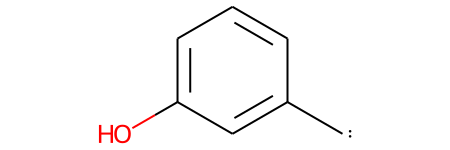

In [ ]:
# read molecule from SMILES
m = Chem.MolFromSmiles('[C@H]c1cc(O)ccc1')
m

In [ ]:
# get atoms
[atom.GetSymbol() for atom in m.GetAtoms()]

['C', 'C', 'C', 'C', 'O', 'C', 'C', 'C']

In [ ]:
# get atom by index
m.GetAtomWithIdx(0).GetSymbol()

'C'

In [ ]:
# get the neighbors of an atom
print([x.GetSymbol() for x in m.GetAtomWithIdx(3).GetNeighbors()])

['C', 'O', 'C']

In [ ]:
b = m.GetAtomWithIdx(3).GetNeighbors()[-1].GetBonds()[0]
print(b.GetBeginAtomIdx(), b.GetEndAtomIdx(), b.GetBondType())

3 5 AROMATIC


### node features

In [ ]:
def create_one_hot_encoding(query, vocab):
    if query not in vocab:
        query = vocab[-1] # use 'other' as the last element
    one_hot_vec = [int(match_result) for match_result in list(map(lambda item: query == item, vocab))]
    return one_hot_vec

In [ ]:
def adj_mx_to_edge_list(adj_matrix, wide=True):
    '''
    This takes a 2d array as input, and output an edge list (source, targe) with shape (2, n_edges).
    '''
    row_idx, col_idx = np.nonzero(adj_matrix)
    row_idx = np.array(row_idx)
    col_idx = np.array(col_idx)
    if wide:
        edge_list = np.stack((row_idx, col_idx), axis=0)
    else:
        edge_list = np.stack((row_idx, col_idx), axis=1)
    return edge_list

def edge_list_to_adj_mx(edge_list):
    '''
    This takes a 2d-array edge list (source, targe) as input, and output an adj_matrix.
    '''
    n_row, n_col = edge_list.shape
    # wide
    if n_row < n_col:
        dim_adj = int(n_col/2)
        adj_matrix = np.zeros((dim_adj, dim_adj), dtype=np.int64)
        for k in range(n_col):
            i = edge_list[0, k]
            j = edge_list[1, k]
            adj_matrix[i, j] = 1
    else: 
        dim_adj = int(n_row/2)
        adj_matrix = np.zeros((dim_adj, dim_adj), dtype=np.int64)
        for i, j in edge_list:
            adj_matrix[i, j] = 1
    return adj_matrix

In [ ]:
vocab = {
    'atom_type': ['Li', 'Be', 'B', 'C','N','O','F','Na','Mg','Al','Si','P','S','Cl','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga','Ge','As','Se','Br','I','Tl','Yb','Sb','Sn','Ag','Pd','Co','Au','Cd','In','Zr','Pt','Hg','Pb','OTHER'],
    'hybridization': ["S", "SP", "SP2", "SP3", "SP3D", "SP3D2", "OTHER"],
    'chirality_type': ["CHI_UNSPECIFIED", "CHI_TETRAHEDRAL_CW", "CHI_TETRAHEDRAL_CCW", "OTHER"],
    'num_neighbors': [0, 1, 2, 3, 4, "MoreThanFour"],
    'formal_charge': [-3, -2, -1, 0, 1, 2, 3, "OTHER"],
    'num_hydrogens': [0, 1, 2, 3, 4, "MoreThanFour"],
    'bond_type': ["SINGLE", "DOUBLE", "TRIPLE", "AROMATIC"],
    'stereo_type': ["STEREOZ", "STEREOE", "STEREOANY", "STEREONONE"],

}

In [ ]:
class Chemical_Graph:
    def __init__(self, smiles, label, vocab, chirality=True, hydrogens_implicit=True, stereochemistry=True):
        self.molecule = Chem.MolFromSmiles(smiles)
        self.label = torch.tensor(np.array([label])).float()
        self.vocab = vocab
        if not hydrogens_implicit:
            self.vocab['atom_type'] = ['H'] + self.vocab['atom_type']
        self.chirality = chirality
        self.hydrogens_implicit = hydrogens_implicit
        self.stereochemistry = stereochemistry
        # standard scalers
        self.scalers = {
            'atomic_mass': None,
            'vdw_radius': None,
            'covalent_radius': None,
        }
        self.create_scalers()
        # dimensions
        self.n_nodes = self.molecule.GetNumAtoms()
        self.n_edges = 2*self.molecule.GetNumBonds()
        self.n_node_features = len(self.get_atom_features(self.molecule.GetAtomWithIdx(0)))
        self.n_egde_features = len(self.get_bond_features(self.molecule.GetBonds()[0]))
        # get graph-level data (node/edge features, edge_index, label)
        self.get_graph_data()

    def train_standard_scaler(self, atom_features):
        '''
        input should be a 2d array
        '''
        scaler = StandardScaler()
        scaler.fit(atom_features)
        return scaler
    
    def scaler_transform(self, scaler, data):
        scaled_array = scaler.transform(np.array(data).reshape(-1, 1))
        return list(scaled_array.reshape(-1))

    def create_scalers(self):
        atomic_mass = [float(atom.GetMass()) for atom in self.molecule.GetAtoms()]
        vdw_radius = [float(Chem.GetPeriodicTable().GetRvdw(atom.GetAtomicNum())) for atom in self.molecule.GetAtoms()]
        covalent_radius = [float(Chem.GetPeriodicTable().GetRcovalent(atom.GetAtomicNum())) for atom in self.molecule.GetAtoms()]
        self.scalers['atomic_mass'] = self.train_standard_scaler(atom_features=np.array(atomic_mass).reshape(-1, 1))
        self.scalers['vdw_radius'] = self.train_standard_scaler(atom_features=np.array(vdw_radius).reshape(-1, 1))
        self.scalers['covalent_radius'] = self.train_standard_scaler(atom_features=np.array(covalent_radius).reshape(-1, 1))

    def get_atom_features(self, atom, external_atom_embedding=None):
        '''
        This generates lists of feature vectors for a given atom, and combines features into a single list of vector. 
        Output in np.array.
        '''
        if external_atom_embedding:
            atom_type_vec = list(external_atom_embedding)
        else:
            atom_type_vec = create_one_hot_encoding(str(atom.GetSymbol()), self.vocab['atom_type'])
        num_neighbors_vec = create_one_hot_encoding(int(atom.GetDegree()), self.vocab['num_neighbors'])    
        formal_charge_vec = create_one_hot_encoding(int(atom.GetFormalCharge()), self.vocab['formal_charge'])    
        hybridisation_type_vec = create_one_hot_encoding(str(atom.GetHybridization()), self.vocab['hybridization'])   
        is_ring_vec = [int(atom.IsInRing())]    
        is_aromatic_vec = [int(atom.GetIsAromatic())]
        # use trained scaler to scale selected features
        atomic_mass_scaled_vec = self.scaler_transform(self.scalers['atomic_mass'], atom.GetMass())
        vdw_radius_scaled_vec = self.scaler_transform(self.scalers['vdw_radius'], Chem.GetPeriodicTable().GetRvdw(atom.GetAtomicNum()))
        covalent_radius_scaled_vec = self.scaler_transform(self.scalers['covalent_radius'], Chem.GetPeriodicTable().GetRcovalent(atom.GetAtomicNum()))
        # combine features vectors into a single list
        atom_features_vec = atom_type_vec + num_neighbors_vec + formal_charge_vec + hybridisation_type_vec + is_ring_vec + is_aromatic_vec + atomic_mass_scaled_vec + vdw_radius_scaled_vec + covalent_radius_scaled_vec

        if self.chirality:
            chirality_type_vec = create_one_hot_encoding(str(atom.GetChiralTag()), self.vocab['chirality_type'])
            atom_features_vec += chirality_type_vec
    
        if not self.hydrogens_implicit:
            num_hydrogens_vec = create_one_hot_encoding(int(atom.GetTotalNumHs()), self.vocab['num_hydrogens'])
            atom_features_vec += num_hydrogens_vec

        return np.array(atom_features_vec)

    def get_bond_features(self, bond):
        '''
        This generates lists of feature vectors for a given bond, and combines features into a single list of vector. 
        Output in np.array.
        '''
        bond_type_vec = create_one_hot_encoding(str(bond.GetBondType()), self.vocab['bond_type'])   
        bond_is_conjugated_vec = [int(bond.GetIsConjugated())]   
        bond_is_ring_vec = [int(bond.IsInRing())]  

        bond_features_vec = bond_type_vec + bond_is_conjugated_vec + bond_is_ring_vec
    
        if self.stereochemistry:
            stereo_type_vec = create_one_hot_encoding(str(bond.GetStereo()), self.vocab['stereo_type'])
            bond_features_vec += stereo_type_vec
        return np.array(bond_features_vec)

    def get_graph_data(self):
        # node features (X)
        X = np.zeros((self.n_nodes, self.n_node_features))
        for atom in self.molecule.GetAtoms():
            X[atom.GetIdx(), :] = self.get_atom_features(atom)
        self.X = torch.tensor(X).float()
        # edge index (source, target)
        edge_index = adj_mx_to_edge_list(GetAdjacencyMatrix(self.molecule))
        self.edge_index = torch.tensor(edge_index).float()
        # edge features
        edge_features = np.zeros((self.n_edges, self.n_egde_features))
        for (bond_idx, (row_idx, col_idx)) in enumerate(self.edge_index):        
            edge_features[bond_idx] = self.get_bond_features(self.molecule.GetBondBetweenAtoms(int(row_idx),int(col_idx)))
        self.edge_attr = torch.tensor(edge_features).float()

    def prepare_pyG_dataset(self):
        return Data(x=self.X, edge_index=self.edge_index, edge_attr=self.edge_attr, y=self.label)
         

In [ ]:
def prepare_dataset(smiles_codes, labels, vocab):
    data_list = []
    for smiles_code, label in list(zip(smiles_codes, labels)):
        graph = Chemical_Graph(smiles_code, label, vocab)
        data_list.append(graph.prepare_pyG_dataset())
    return data_list

In [ ]:
g = Chemical_Graph('[C@H]c1cc(O)ccc1', 1, vocab)

In [ ]:
# atom type
atom_list = ['C','N','O','S','F']
[int(match_result) for match_result in list(map(lambda s: 'C' == s, atom_list))]

[1, 0, 0, 0, 0]

In [ ]:
# num_neighbors
m.GetAtomWithIdx(3).GetDegree()

3

In [ ]:
# num_bonds
m.GetAtomWithIdx(3).GetBonds()

(<rdkit.Chem.rdchem.Bond at 0x7fadf8e6bbc0>,
 <rdkit.Chem.rdchem.Bond at 0x7fadf8d93d50>)

In [ ]:
# formal charge
m.GetAtomWithIdx(4).GetFormalCharge()

0

In [ ]:
# hybridization
str(m.GetAtomWithIdx(4).GetHybridization())

'SP2'

In [ ]:
# num_hydrogen
m.GetAtomWithIdx(4).GetTotalNumHs()

1

In [ ]:
# Van der Watt radius
float((Chem.GetPeriodicTable().GetRvdw(m.GetAtomWithIdx(4).GetAtomicNum())))

1.55

### bonds

In [ ]:
# get bonds
[(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), str(bond.GetBondType())) for bond in m.GetBonds()]

[(0, 1, 'SINGLE'),
 (1, 2, 'AROMATIC'),
 (2, 3, 'AROMATIC'),
 (3, 4, 'SINGLE'),
 (3, 5, 'AROMATIC'),
 (5, 6, 'AROMATIC'),
 (6, 7, 'AROMATIC'),
 (7, 1, 'AROMATIC')]

In [ ]:
m.GetBonds()[0].GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

### adjacency matrix

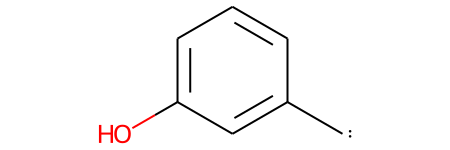

In [ ]:
m

In [ ]:
adj = GetAdjacencyMatrix(m)
print(adj.shape)
print(f"adj_matrix:\n {adj}")

(8, 8)
adj_matrix:
 [[0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 1]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 1 1 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0]
 [0 0 0 0 0 1 0 1]
 [0 1 0 0 0 0 1 0]]


In [ ]:
row_idx, col_idx = np.nonzero(adj)
print(row_idx)
print(col_idx)

[0 1 1 1 2 2 3 3 3 4 5 5 6 6 7 7]
[1 0 2 7 1 3 2 4 5 3 3 6 5 7 1 6]


In [ ]:
np.stack((np.array(row_idx), np.array(col_idx)), axis=1)

array([[0, 1],
       [1, 0],
       [1, 2],
       [1, 7],
       [2, 1],
       [2, 3],
       [3, 2],
       [3, 4],
       [3, 5],
       [4, 3],
       [5, 3],
       [5, 6],
       [6, 5],
       [6, 7],
       [7, 1],
       [7, 6]])

In [ ]:
np.array([[r, c] for r, c in zip(row_idx, col_idx)])

array([[0, 1],
       [1, 0],
       [1, 2],
       [1, 7],
       [2, 1],
       [2, 3],
       [3, 2],
       [3, 4],
       [3, 5],
       [4, 3],
       [5, 3],
       [5, 6],
       [6, 5],
       [6, 7],
       [7, 1],
       [7, 6]])

In [ ]:
torch.tensor(np.array([[r, c] for r, c in zip(row_idx, col_idx)])).float().size()

torch.Size([16, 2])

In [ ]:
np.array([[r, c] for r, c in zip(row_idx, col_idx)]).reshape(2, 16)

array([[0, 1, 1, 0, 1, 2, 1, 7, 2, 1, 2, 3, 3, 2, 3, 4],
       [3, 5, 4, 3, 5, 3, 5, 6, 6, 5, 6, 7, 7, 1, 7, 6]])

In [ ]:
edge_list = adj_mx_to_edge_list(adj)
edge_list

array([[0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 6, 6, 7, 7],
       [1, 0, 2, 7, 1, 3, 2, 4, 5, 3, 3, 6, 5, 7, 1, 6]])

In [ ]:
edge_list_to_adj_mx(edge_list) == adj

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [ ]:
edge_list = adj_mx_to_edge_list(adj, False)
edge_list

array([[0, 1],
       [1, 0],
       [1, 2],
       [1, 7],
       [2, 1],
       [2, 3],
       [3, 2],
       [3, 4],
       [3, 5],
       [4, 3],
       [5, 3],
       [5, 6],
       [6, 5],
       [6, 7],
       [7, 1],
       [7, 6]])

In [ ]:
edge_list_to_adj_mx(edge_list)

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0]])

In [ ]:
edge_list_to_adj_mx(edge_list) == adj

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])